# Atmospheric CO2 seasonal cycles

Using the data from Cape Grimm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sb
import numpy as np
import statsmodels.formula.api as smf
from scipy.signal import detrend

In [6]:
df = pd.read_csv('/g/data/os22/chad_tmp/AusENDVI/data/CapeGrim_CO2_data.csv')
df['time']= pd.to_datetime(df[['year', 'month', 'day']])
df  = df.set_index('time').drop(['year', 'month', 'day'], axis=1)

#detrend
df['CO2(ppm)'] = detrend(df['CO2(ppm)'].values)

In [3]:
ds = df.to_xarray()
ds = ds.sel(time=slice('1982','2022'))

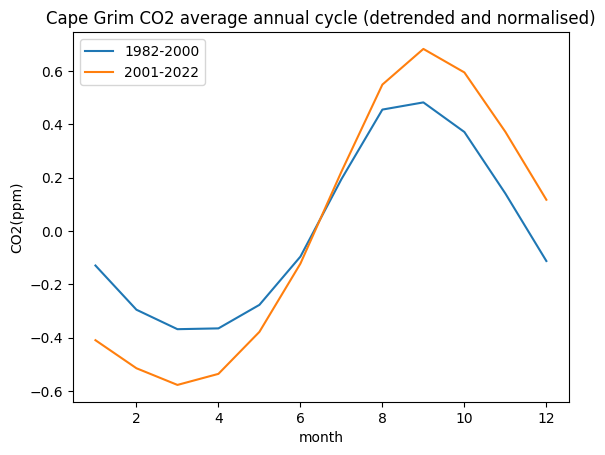

In [4]:
early_mean = ds['CO2(ppm)'].sel(time=slice('1982','2000')).mean('time')
early_clim = ds['CO2(ppm)'].sel(time=slice('1982','2000')).groupby('time.month').mean()

late_mean = ds['CO2(ppm)'].sel(time=slice('2001','2022')).mean('time')
late_clim = ds['CO2(ppm)'].sel(time=slice('2001','2022')).groupby('time.month').mean()

(early_clim-early_mean).plot(label='1982-2000')
(late_clim-late_mean).plot(label='2001-2022')

plt.legend()
plt.title('Cape Grim CO2 average annual cycle (detrended and normalised)');

In [6]:
def range(ds):
    return ds.max() - ds.min()

annual_range = ds['CO2(ppm)'].groupby('time.year').apply(range)

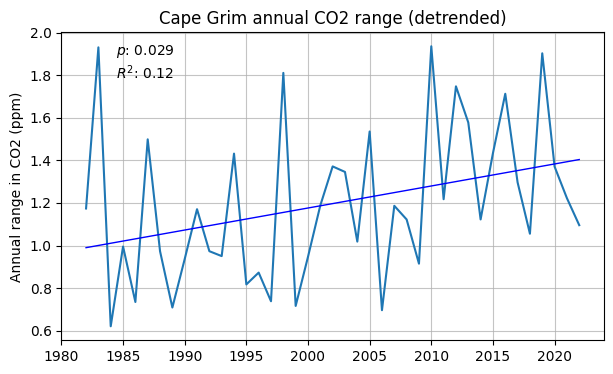

In [7]:
df = annual_range.to_dataframe().reset_index().rename({'year':'x', 'CO2(ppm)':'y'}, axis=1)

weights = np.polyfit(df['x'],df['y'], 1)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)', data=df).fit()
p = results.pvalues['model(x)']
r2 = results.rsquared

fig,ax = plt.subplots(1,1, figsize=(7,4))
annual_range.plot(ax=ax)
sb.lineplot(ax=ax, x=df['x'], y=model(df['x']), color="blue", lw=1)
ax.text(0.10, 0.85, f"$p$: {p:.3f}\n$R^2$: {r2:.2f}", transform=ax.transAxes, fontsize=10)
ax.grid(alpha=0.75)
ax.set_ylabel('Annual range in CO2 (ppm)')
ax.set_xlabel(None)
plt.title('Cape Grim annual CO2 range (detrended)');